In [41]:
from __future__ import print_function
from builtins import input

import numpy as np

from sporco.admm import tvl1
from sporco import util
from sporco import signal
from sporco import metric
from sporco import plot
plot.config_notebook_plotting()

In [42]:
img = util.ExampleImages().image('e.jpg', scaled=True,
                                 idxexp=np.s_[:,:])

In [43]:
np.random.seed(12345)
imgn = signal.spnoise(img, 0.44)

In [44]:
lmbda = 1.0
opt = tvl1.TVL1Denoise.Options({'Verbose': True, 'MaxMainIter': 100,
                                'RelStopTol': 8e-3, 'gEvalY': False,
                                'rho': 10.0, 'AutoRho': {'Enabled': True,
                                'Period': 5}})

In [45]:
b = tvl1.TVL1Denoise(imgn, lmbda, opt, caxis=2)
imgr = b.solve()

Itn   Fnc       DFid      RegTV     r         s         ρ       
----------------------------------------------------------------
   0  3.17e+05  1.84e+05  1.33e+05  3.68e-01  9.52e-01  1.00e+01
   1  3.09e+05  1.55e+05  1.54e+05  2.99e-01  9.40e-01  1.00e+01
   2  2.92e+05  1.51e+05  1.40e+05  2.24e-01  7.97e-01  1.00e+01
   3  2.85e+05  1.47e+05  1.38e+05  1.75e-01  8.11e-01  1.00e+01
   4  2.74e+05  1.44e+05  1.31e+05  1.36e-01  7.13e-01  1.00e+01
   5  2.67e+05  1.47e+05  1.20e+05  1.11e-01  6.56e-01  4.37e+00
   6  2.54e+05  1.50e+05  1.04e+05  9.01e-02  5.92e-01  4.37e+00
   7  2.47e+05  1.58e+05  8.95e+04  7.27e-02  5.65e-01  4.37e+00
   8  2.35e+05  1.62e+05  7.36e+04  6.09e-02  5.20e-01  4.37e+00
   9  2.29e+05  1.69e+05  6.03e+04  5.00e-02  4.83e-01  4.37e+00
  10  2.28e+05  1.87e+05  4.13e+04  1.17e-01  3.64e-01  1.41e+00
  11  2.38e+05  2.07e+05  3.04e+04  1.08e-01  2.52e-01  1.41e+00
  12  2.35e+05  2.14e+05  2.14e+04  9.48e-02  1.80e-01  1.41e+00
  13  2.30e+05  2.14e+05 

In [46]:
print("TVL1Denoise solve time: %5.2f s" % b.timer.elapsed('solve'))
print("Noisy image PSNR:    %5.2f dB" % metric.psnr(img, imgn))
print("Denoised image PSNR: %5.2f dB" % metric.psnr(img, imgr))

TVL1Denoise solve time: 145.72 s
Noisy image PSNR:     7.35 dB
Denoised image PSNR: 33.90 dB


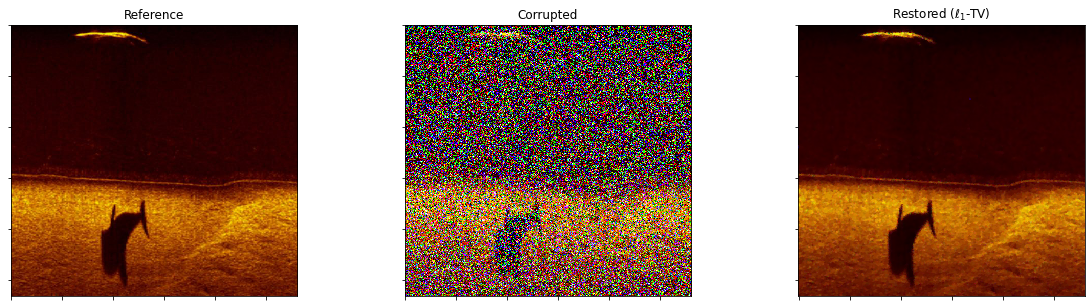

In [47]:
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.imview(img, title='Reference', fig=fig)
plot.subplot(1, 3, 2)
plot.imview(imgn, title='Corrupted', fig=fig)
plot.subplot(1, 3, 3)
plot.imview(imgr, title=r'Restored ($\ell_1$-TV)', fig=fig)
fig.show()

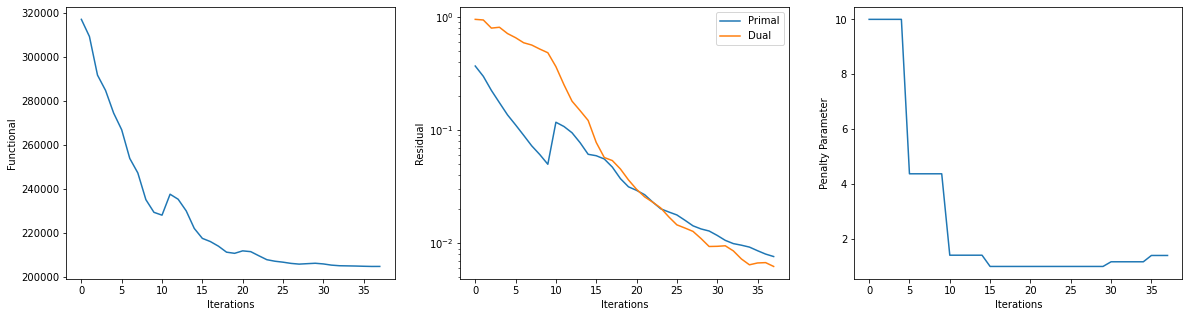

In [48]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()

In [49]:
from skimage.metrics import structural_similarity as ssim
ssim_const_1 = ssim(img, imgr,
                  data_range=imgr.max() - imgr.min(), multichannel=True)

print(ssim_const_1)#structure similarity between two random variables -it measures contrast,variance,mean, luminous,covariance 

0.900013006237535
